<a href="https://colab.research.google.com/github/capriate123/task/blob/main/Vasicek_Model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

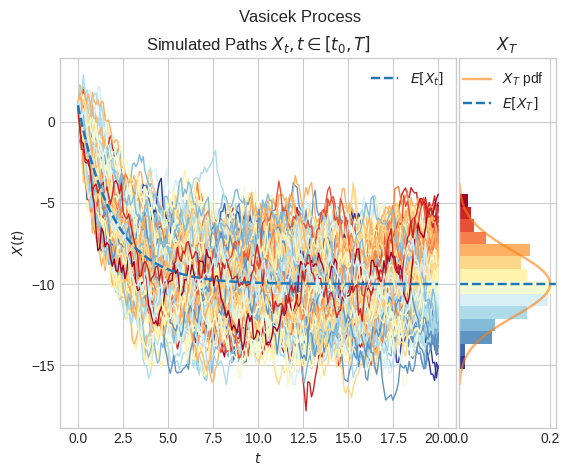

In [ ]:
%pip install aleatory
from aleatory.processes import Vasicek
process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

## Definition

The Vasicek model specifies that the instantaneous interest rate is defined by a stochastic process which can be defined by the following Stochastic Differential Equation (SDE)


\begin{equation}
dX_t = \theta (\mu - X_t) dt + \sigma dW_t, \quad t >0,
\end{equation}


with initial condition  $X_0 =x_0\in\mathbb{R}$, and where $W_t$ is a standard Brownian motion, and the three parameters are constants:

- $\theta>0$ : speed or mean reversion coefficient
- $\mu \in \mathbb{R}$ : long term mean
- $\sigma>0$ : volatility



In order to find the solution to this SDE, let us set the function $f(t,x) = x e^{\theta t}$. Then, Ito's formula implies


\begin{align*}
X_te^{\theta t} &= x_0 +\int_0^t X_s \theta e^{\theta s}ds + \int_0^t e^{\theta s}dX_s \\
& = x_0 + \int_0^t \left[ \theta X_s  e^{\theta s}  +\theta e^{\theta s}(\mu - X_s)\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \int_0^t \left[ \theta e^{\theta s}\mu\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \mu(e^{\theta t} - 1) + \int_0^t e^{\theta s}\sigma dW_s.
\end{align*}


Thus

\begin{equation}
X_t = x_0e^{-\theta t} +  \mu(1- e^{-\theta t})  + \sigma \int_0^t e^{-\theta (t-s)}dW_s.
\end{equation}

### Expectation and Variance

For each $t>0$, the conditional marginal $X_t|X_0$ from a Vacisek process satisfies

\begin{equation*}
\mathbf{E} [X_t ] = \mathbb{E}[X_t|X_0] = x_0e^{-\theta t} +  \mu(1- e^{-\theta t}),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbb{Var} [X_t |X_0] =  \frac{\sigma^2}{ 2\theta} (1- e^{-2\theta t}).
\end{equation*}

To obtain the expectation we simply use the linearity of the expectation and the fact that the Ito integral in equation (2) is a martingale. Similarly, for the variance we  use basic properties of the variance and the isometry property of the Ito integral.

### Python Implementation

So, for given $x_0, \theta>0, \mu, \sigma>0$ and $t,s>0$ You will implement the above formulas for the expectation, variance, and covariance as follows.

### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`.

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

Mean of X_t: 0.06296
Variance of X_t: 0.00030


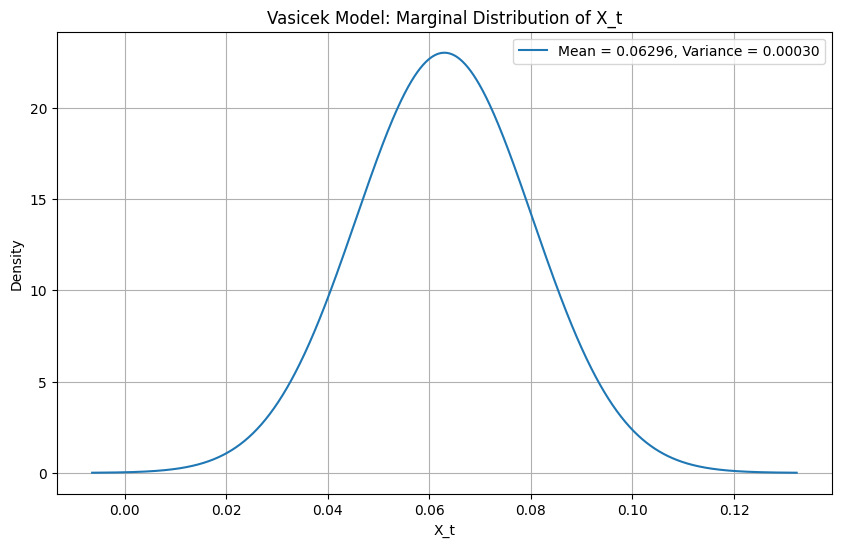

In [ ]:
from scipy.stats import norm
import numpy as np
#### Calculate Mean and Varaince of Normal Distribution with initial values of X0,mu,sigma,t
import matplotlib.pyplot as plt
x0 = 0.05  # Initial interest rate
mu = 0.1   # Long-term mean interest rate
theta = 0.3  # Speed of mean reversion
sigma = 0.02  # Volatility
t = 1.0  # Time horizon

# Function to calculate the mean of the Vasicek model
def calculate_mean(x0, mu, theta, t):
    return x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

# Function to calculate the variance of the Vasicek model
def calculate_variance(sigma, theta, t):
    return (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

# Calculate mean and variance
mean_xt = calculate_mean(x0, mu, theta, t)
variance_xt = calculate_variance(sigma, theta, t)

print(f"Mean of X_t: {mean_xt:.5f}")
print(f"Variance of X_t: {variance_xt:.5f}")

# Plotting the normal distribution for X_t
def plot_distribution(mean, variance):
    std_dev = np.sqrt(variance)
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
    pdf = norm.pdf(x, mean, std_dev)

    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, label=f"Mean = {mean:.5f}, Variance = {variance:.5f}")
    plt.title("Vasicek Model: Marginal Distribution of X_t")
    plt.xlabel("X_t")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

plot_distribution(mean_xt, variance_xt)



### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \theta,  \mu, \sigma, x_0) = \dfrac{1}{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})} \sqrt{2 \pi }}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x- [x_0e^{-\theta t} +  \mu(1- e^{-\theta t})] }{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

First we consider the process
`Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)` and plot the marginal density of $X_1$.
Note that the mean is still far from the long term mean $\mu=10$. Code it and plot the Graph of Distribution
'''
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
''''

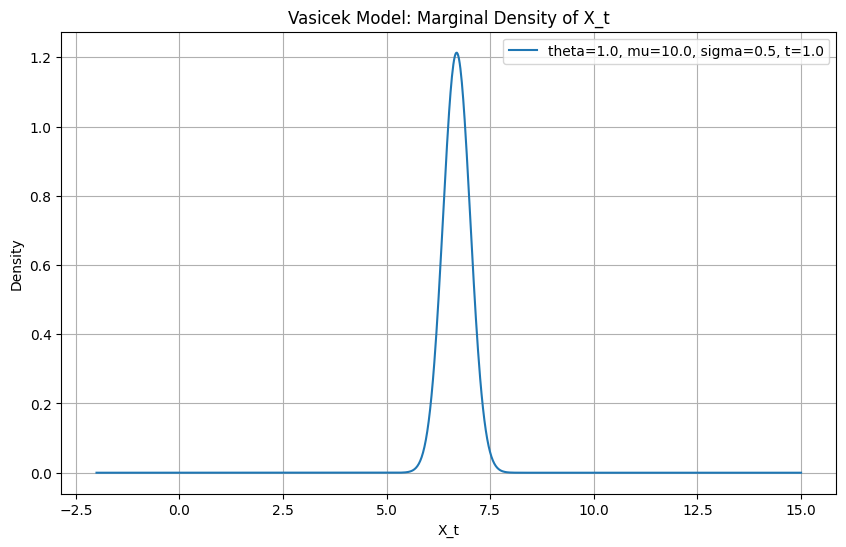

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the Vasicek model
x0 = 1.0  # Initial interest rate
mu = 10.0  # Long-term mean interest rate
theta = 1.0  # Speed of mean reversion
sigma = 0.5  # Volatility
t = 1.0  # Time horizon

# Probability Density Function of the Vasicek Model
def vasicek_pdf(x, t, theta, mu, sigma, x0):
    mean_xt = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
    variance_xt = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    std_dev_xt = np.sqrt(variance_xt)

    return norm.pdf(x, loc=mean_xt, scale=std_dev_xt)

# Generate and plot marginal density of X_1
def plot_vasicek_density(theta, mu, sigma, x0, t):
    x = np.linspace(-2, 15, 1000)  # Range of x values
    pdf = vasicek_pdf(x, t, theta, mu, sigma, x0)

    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, label=f"theta={theta}, mu={mu}, sigma={sigma}, t={t}")
    plt.title("Vasicek Model: Marginal Density of X_t")
    plt.xlabel("X_t")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

# Plot with initial parameters
plot_vasicek_density(theta, mu, sigma, x0, t)





**Plot Graphs** Dsitrbution in which Vary one at time ( sigma,mu,theta ,t ) . Vary one value taking  initial values of sigma,mu,theta,t

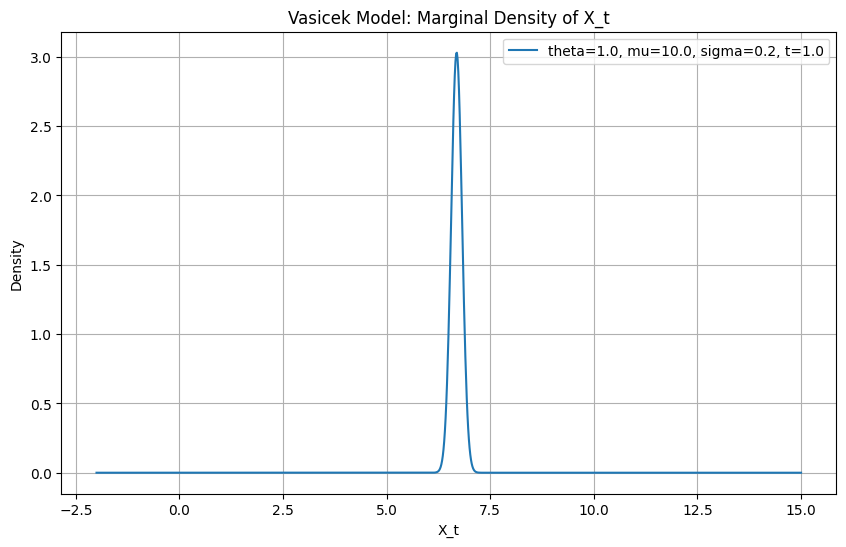

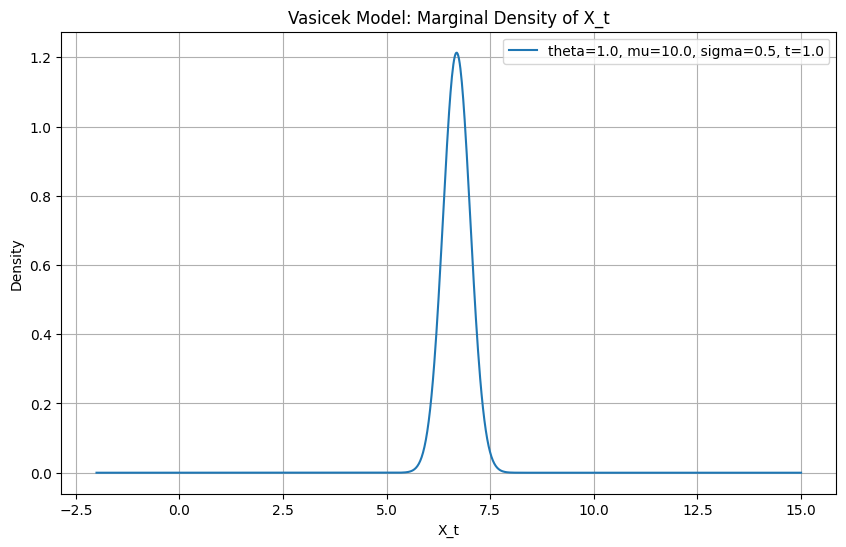

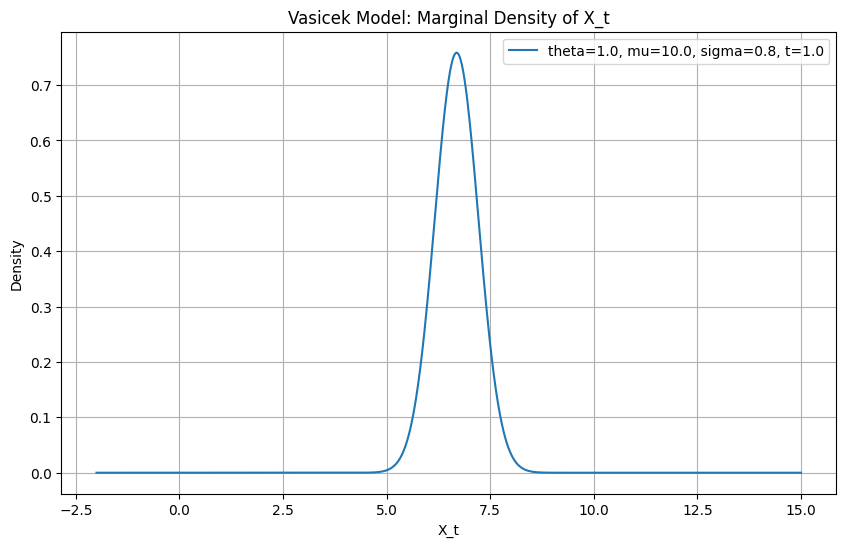

In [ ]:
for varying_sigma in [0.2, 0.5, 0.8]:
    plot_vasicek_density(theta, mu, varying_sigma, x0, t)

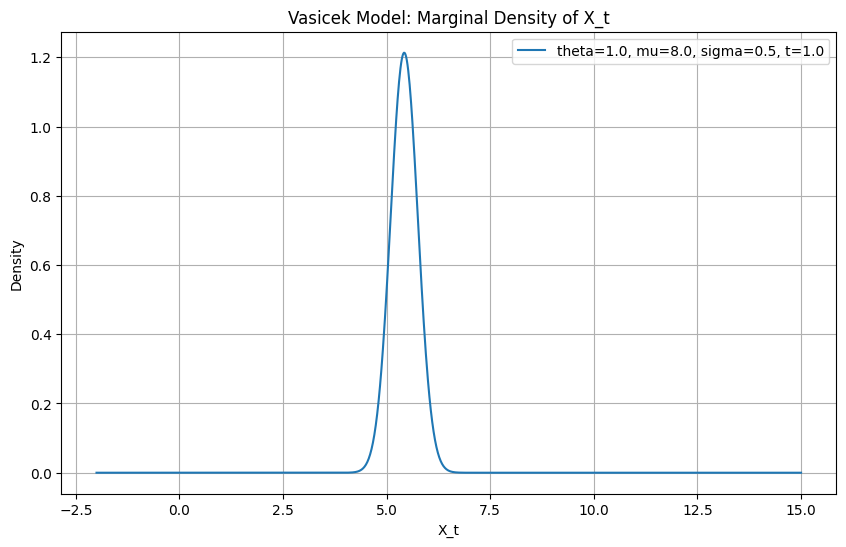

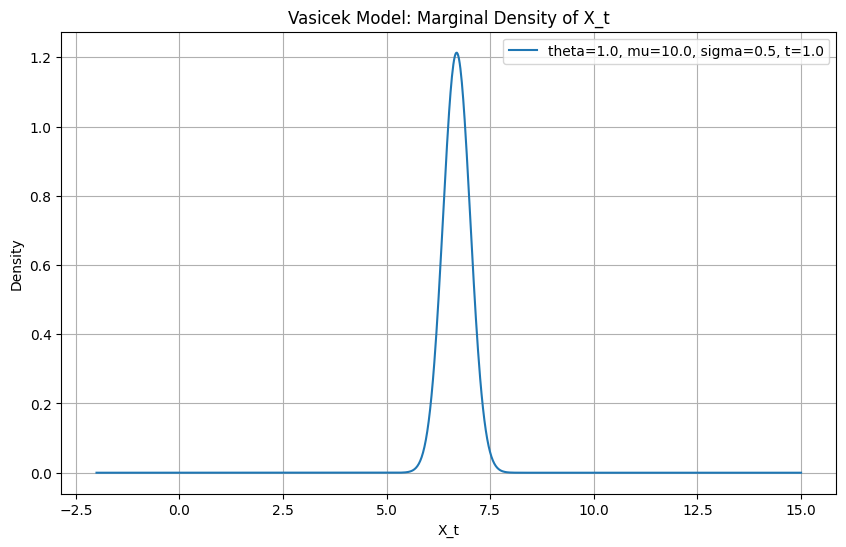

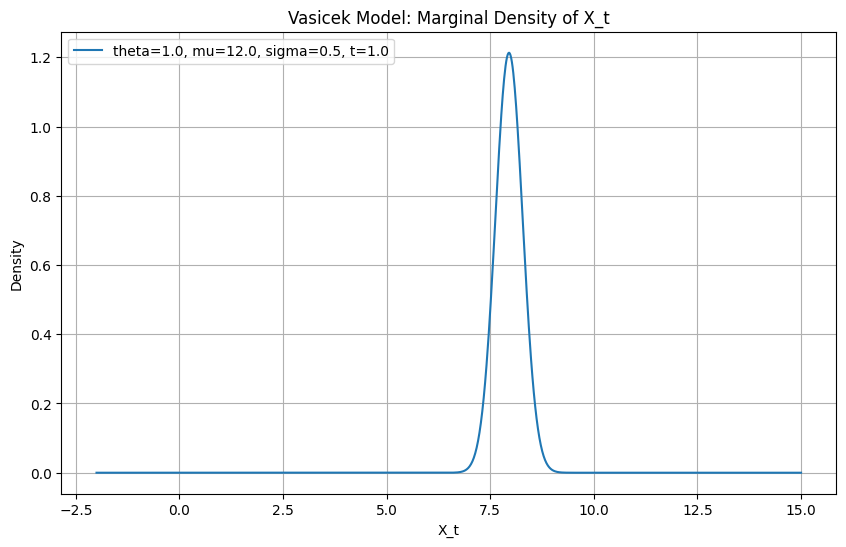

In [ ]:
for varying_mu in [8.0, 10.0, 12.0]:
    plot_vasicek_density(theta, varying_mu, sigma, x0, t)

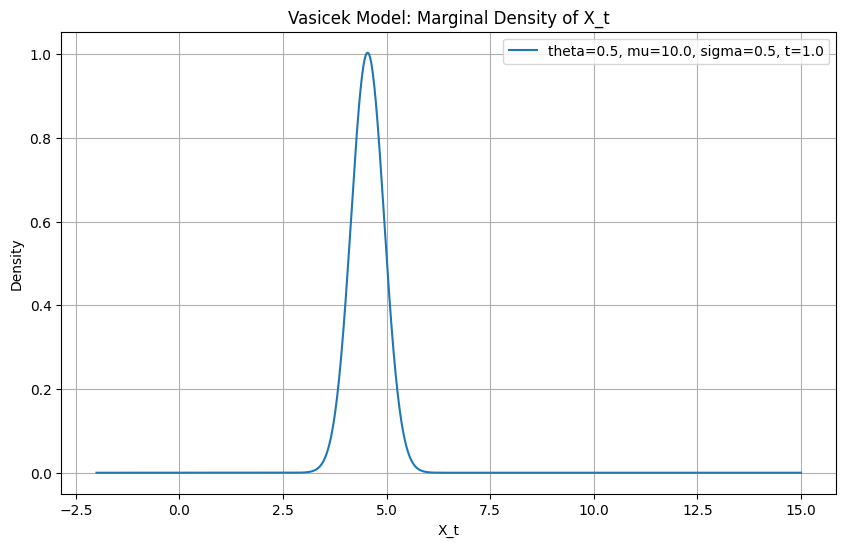

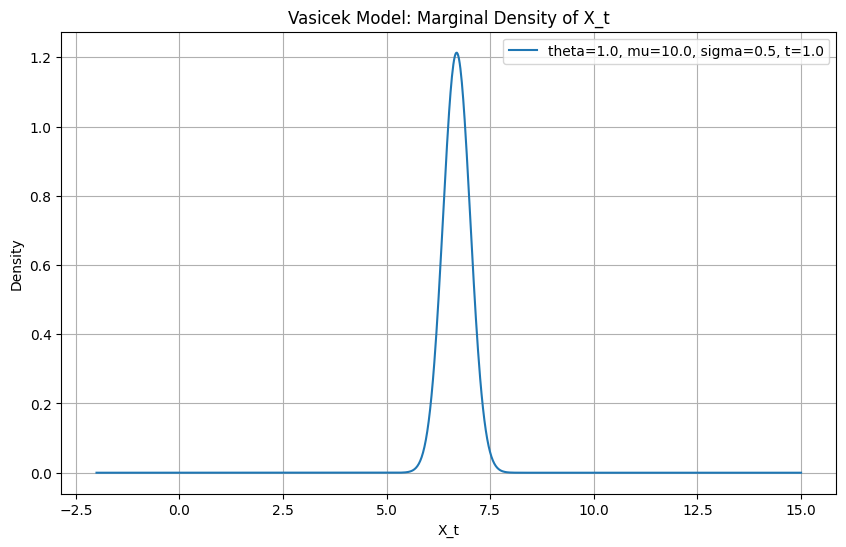

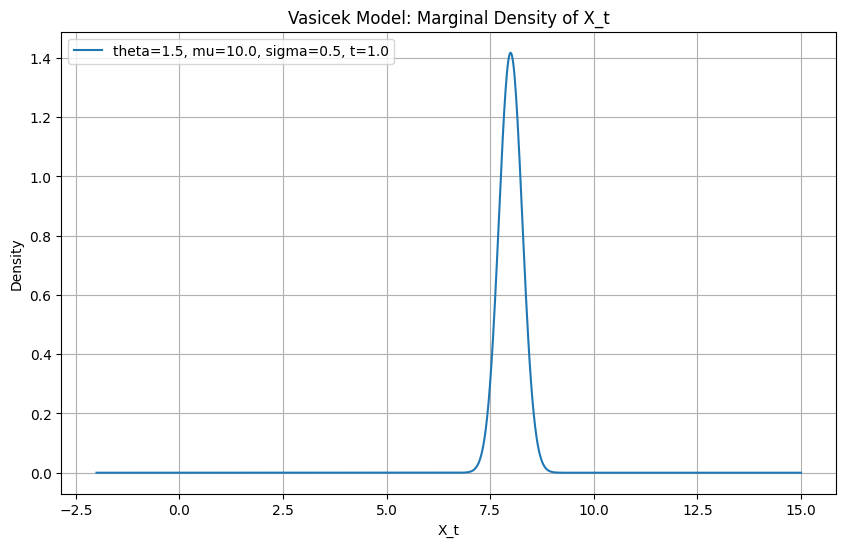

In [ ]:
for varying_theta in [0.5, 1.0, 1.5]:
    plot_vasicek_density(varying_theta, mu, sigma, x0, t)

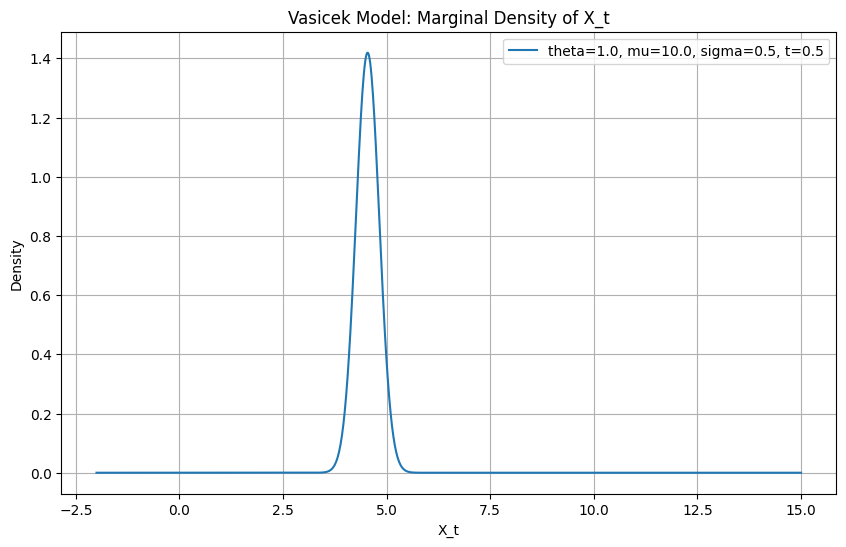

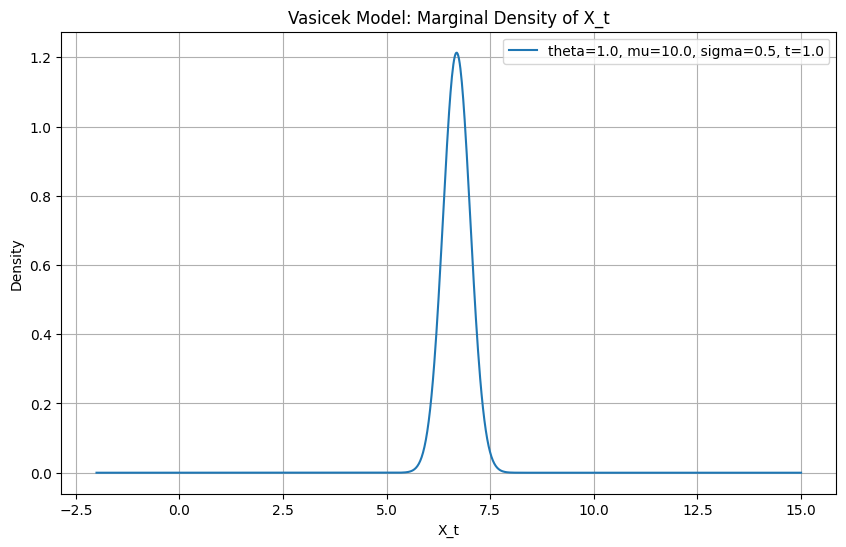

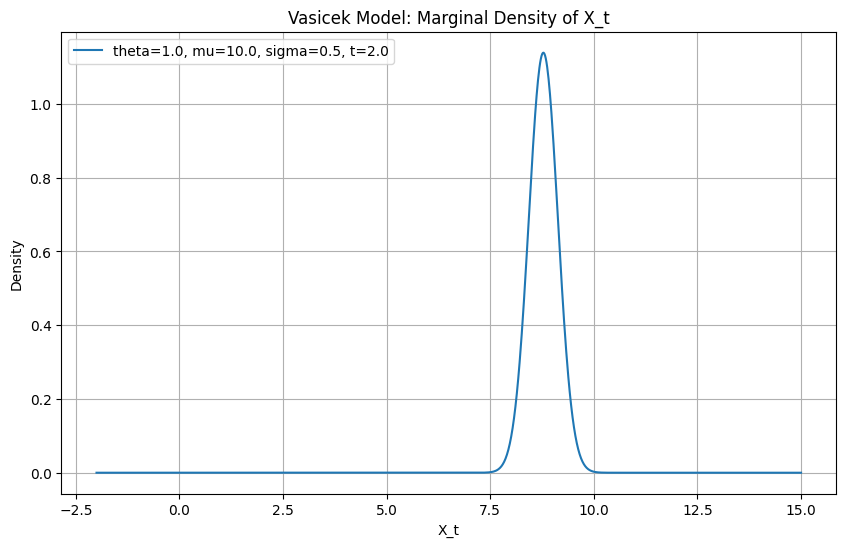

In [ ]:
for varying_t in [0.5, 1.0, 2.0]:
    plot_vasicek_density(theta, mu, sigma, x0, varying_t)

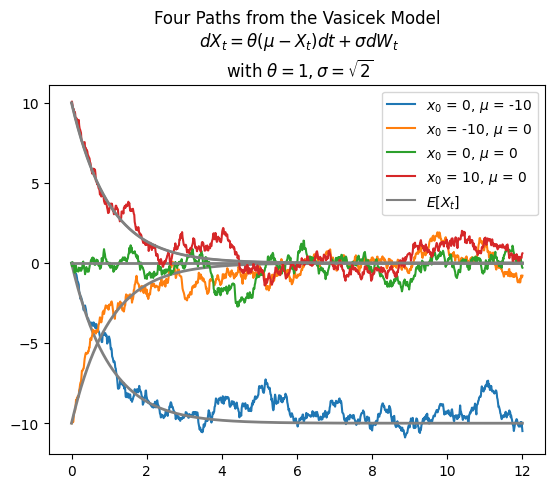

In [ ]:
#from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

**Simulation**

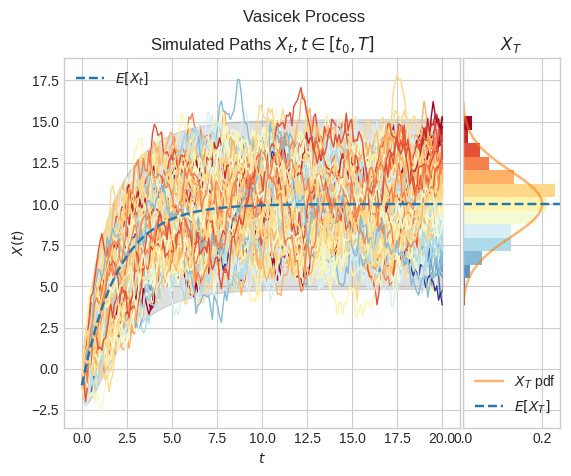

In [ ]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

#### The parameter $\theta$ determines the Speed of Convergence

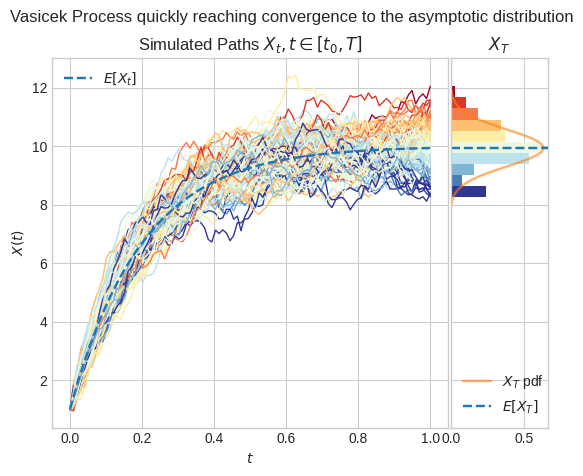

In [ ]:
# from aleatory.processes import Vasicek
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

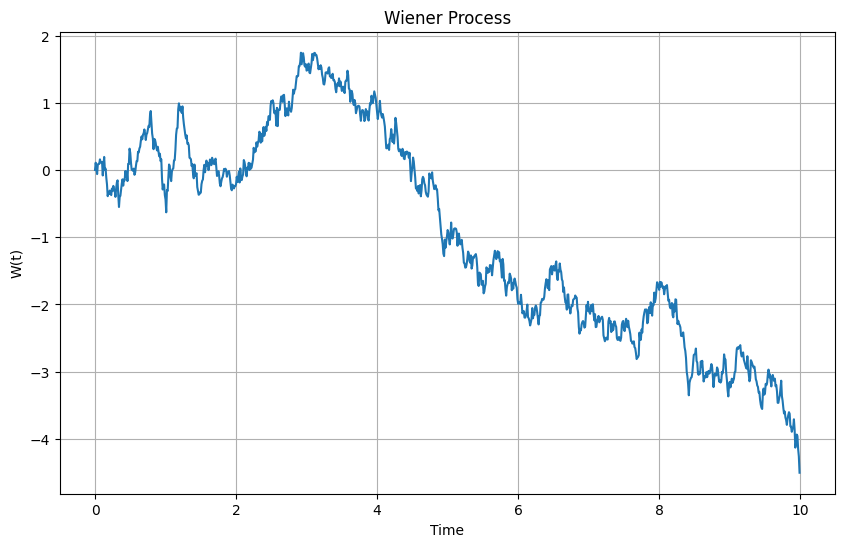

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

In [ ]:
pip install aleatory


#Plot different no. of paths by varying parameter and time interval!

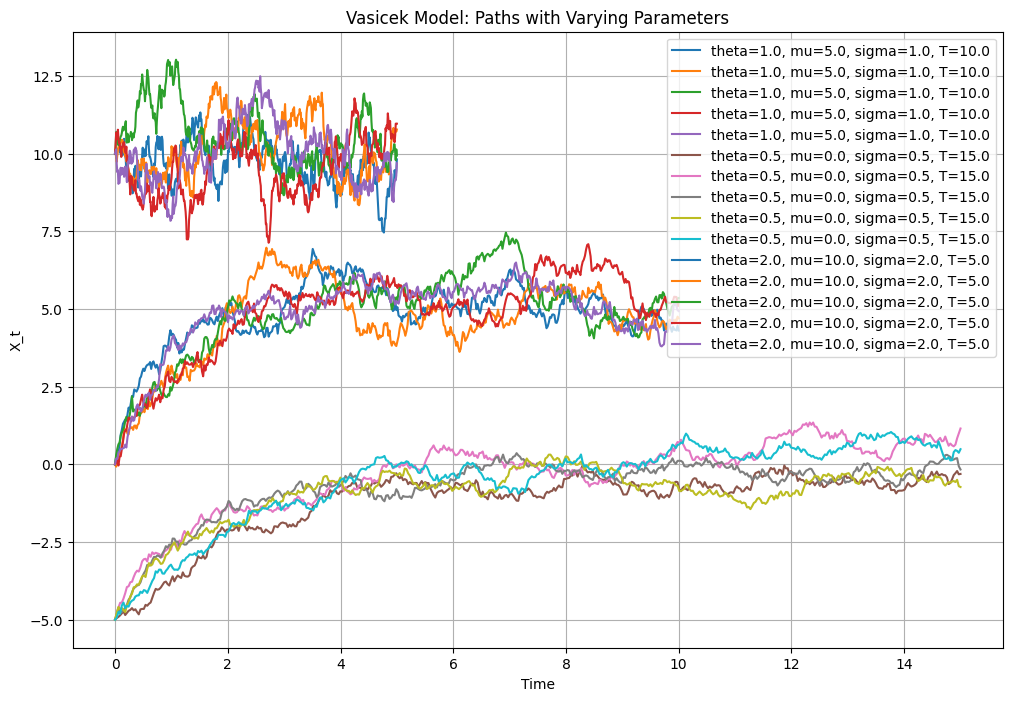

In [ ]:
def plot_varying_paths():
    param_sets = [
        {'theta': 1.0, 'mu': 5.0, 'sigma': 1.0, 'T': 10.0, 'initial': 0.0},
        {'theta': 0.5, 'mu': 0.0, 'sigma': 0.5, 'T': 15.0, 'initial': -5.0},
        {'theta': 2.0, 'mu': 10.0, 'sigma': 2.0, 'T': 5.0, 'initial': 10.0}
    ]

    plt.figure(figsize=(12, 8))

    for params in param_sets:
        process = Vasicek(**params)
        ts = process.times
        if ts is None:
            ts = np.linspace(0, params['T'], 500)  # Fallback to generate time array
        paths = process.simulate(n=500, N=5)

        # Check if paths are generated properly
        if paths is not None and len(paths) > 0:
            for path in paths:
                plt.plot(ts, path, label=f"theta={params['theta']}, mu={params['mu']}, sigma={params['sigma']}, T={params['T']}")
        else:
            print(f"Simulation failed for params: {params}")

    plt.title('Vasicek Model: Paths with Varying Parameters')
    plt.xlabel('Time')
    plt.ylabel('X_t')
    plt.grid()
    plt.legend()
    plt.show()

plot_varying_paths()
